In [17]:
import pandas as pd
import spacy
ner = spacy.load("en_core_web_sm")
import matplotlib.pyplot as plt

In [18]:
df = pd.DataFrame(pd.read_csv('liar2/train.csv'))
df.head(3)

,id,label,statement,date,subject,speaker,speaker_description,state_info,true_counts,mostly_true_counts,half_true_counts,mostly_false_counts,false_counts,pants_on_fire_counts,context,justification
0,13847,5,"90 percent of Americans ""support universal bac...","October 2, 2017",government regulation;polls and public opinion...,chris abele,"Chris Abele is Milwaukee County Executive, a p...",wisconsin,1,4,5,3,5,2,a tweet,"""Universal"" is the term for background checks ..."
1,13411,1,Last year was one of the deadliest years ever ...,"May 19, 2017",after the fact;congress;criminal justice;histo...,thom tillis,Thom Tillis is a Republican who serves as U.S....,north carolina,0,2,7,3,2,0,a press release supporting the Back The Blue A...,"Sen. Thom Tillis, a North Carolina Republican,..."
2,10882,0,"Bernie Sanders's plan is ""to raise your taxes ...","October 28, 2015",taxes,chris christie,"Chris Christie announced June 6, 2023 that he ...",national,21,20,27,11,17,8,"Boulder, Colo","Christie said that Sanders’s plan is ""to raise..."


In [19]:
df['label_binary'] = df['label'].isin([3, 4, 5]).astype(int)

df_true = df[df['label_binary'] == 1]
df_false = df[df['label_binary'] == 0]
print(df_true.shape[0])
print(df_false.shape[0])

7778
10591


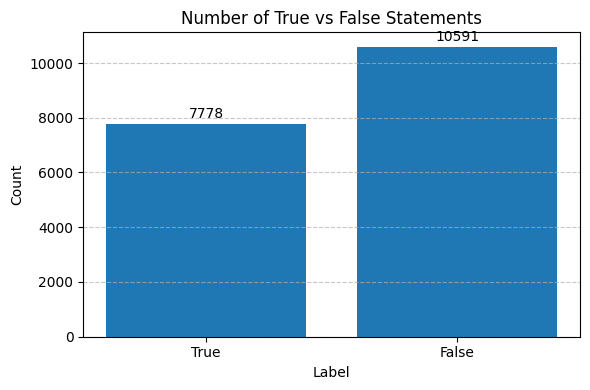

In [20]:
labels = ['True', 'False']
counts = [df_true.shape[0], df_false.shape[0]]

plt.figure(figsize=(6, 4))
bars = plt.bar(labels, counts)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 100, str(height),
             ha='center', va='bottom', fontsize=10)

plt.title('Number of True vs False Statements')
plt.ylabel('Count')
plt.xlabel('Label')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
from pyspark.sql import SparkSession

# create spark session
spark = SparkSession.builder \
    .appName("YelpAnalysis") \
    .getOrCreate()

print(spark)

In [ ]:
# QUESTION 1
from pyspark.sql.functions import count

# Load the review dataset
review_df = spark.read.json("../../yelp/yelp_academic_dataset_review.json")

# Get the total number of reviews
total_reviews = review_df.agg(count("*").alias("total_reviews"))
    # .agg() applies an aggregation (count)
    # count("*") counts all (*) rows in the dataframe
    # .alias("total_reviews") renames the column to "total_reviews"
total_reviews.show()

In [ ]:
# QUESTION 2
from pyspark.sql.functions import col

# Load the business dataset
business_df = spark.read.json("../../yelp/yelp_academic_dataset_business.json")

# Filter businesses that have 5 stars and at least 500 reviews
five_star_businesses = business_df.filter(
    (col("stars") == 5.0) & (col("review_count") >= 500)
).select("name", "stars", "review_count")

five_star_businesses.show(10)